In [1]:
import time
import plotly.express as px
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import datetime
import warnings
warnings.filterwarnings("ignore")
import os


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datasets-final/calendar.csv
/kaggle/input/datasets-final/prices.csv
/kaggle/input/datasets-final/train.csv


# EDA
In this notebook, we perform minimal EDA to add onto the already comprehensive EDA perfomed for our Statistical Forecasting exercise.

In [3]:
 #set style for all plots
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
sns.mpl.rc("figure",figsize=(10,5))

In [4]:
def agg_and_date (df, calendar, cat, method):
    """
    aggregate by certain categories (eg. store, subcat)
    method can be "sum" or "mean"
    """
    if method == "sum":
        #aggregate sales by cat. take the sum
        subdf = df.groupby(by=cat).sum().transpose()
    elif method == "mean":
        #take the mean
        subdf = df.groupby(by=cat).mean().transpose()
    else:
        raise Exception()
#concatenate calendar information with subdf
    subdf.reset_index( drop=True, inplace=True)
    calendar.reset_index( drop=True, inplace=True)
    subdf = pd.concat([subdf, calendar.date], axis = 1, ignore_index= False)
    subdf.set_index('date', inplace = True)
    return subdf

To start us off, we read the data from the csv-s.  

In [5]:
def read_data ():
    sales = pd.read_csv("/kaggle/input/datasets-final/train.csv", index_col = 0)
    calendar = pd.read_csv("/kaggle/input/datasets-final/calendar.csv", index_col = None)
    prices = pd.read_csv("/kaggle/input/datasets-final/prices.csv")
    return sales, calendar, prices

In [6]:
sales, calendar, prices = read_data () 

In [7]:
print('Number of regions:',len(sales['region_id'].unique()))
print('Number of stores:',len(sales['store_id'].unique()))
print('Number of categories:',len(sales['category_id'].unique()))
print('Number of subcategories:',len(sales['subcat_id'].unique()))
print('Number of items:',len(sales['item_id'].unique()))

Number of regions: 3
Number of stores: 10
Number of categories: 3
Number of subcategories: 7
Number of items: 3049


The structure of the data set can be intuitively represented with the help of a tree map:

In [8]:
gp = sales.groupby(['region_id','store_id','category_id','subcat_id'],as_index=False)
gp = gp['item_id'].count().dropna()
gp['FairStorage'] = 'FairStorage'

fig = px.treemap(gp, path=['FairStorage', 'region_id', 'store_id', 'category_id', 'subcat_id'], values='item_id',
                  color='item_id',
                  color_continuous_scale = 'RdBu',
                  title='Distribution of sale items')
            
fig.update_layout(treemapcolorway = ["pink", "lightgray"])
fig.show()

As we can see, our data contains information on 3 regions (East, Central and West), 10 stores (East_1, East_2, East_3, East_4, Central_1, Central_2, Central_3, West_1, West_2, West_3), 3 categories (Food, Cleaning, and Beaty), which are then further split into 7 subcategories. 
Now, we aggregate our data to visualise it by category, subcategory, and store

In [9]:
df = agg_and_date (sales, calendar, ["category_id"], "mean")

In [10]:
df.head()

,Beauty,Cleaning,Food
date,,,
2011-01-29,0.666195,0.543362,1.612944
2011-01-30,0.594159,0.538109,1.583716
2011-01-31,0.474690,0.375072,1.195129
2011-02-01,0.472389,0.369150,1.313709
2011-02-02,0.321062,0.260649,1.016214


(0.0, 3.0)

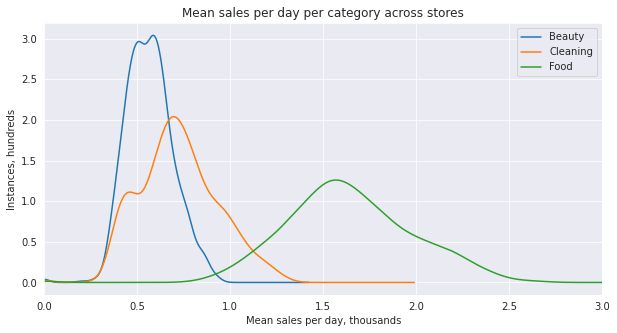

In [11]:
df.plot(kind = 'kde')
plt.xlabel('Mean sales per day, thousands')
plt.ylabel('Instances, hundreds')
plt.title('Mean sales per day per category across stores')
plt.xlim(0,3)

Clearly, Food items are most bought. Now, we want to observe whether the same trends is present forsubcategories as well.

In [12]:
df = agg_and_date (sales, calendar, ["subcat_id"], "mean")

(0.0, 3.5)

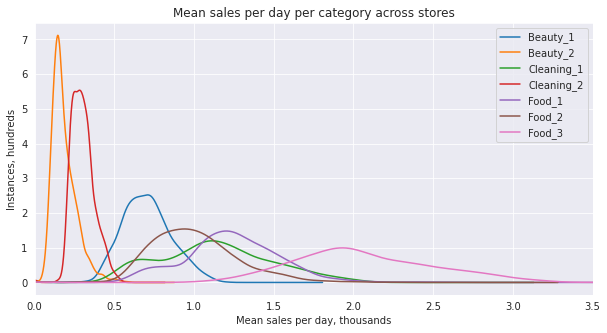

In [13]:
df.plot(kind = 'kde')
plt.xlabel('Mean sales per day, thousands')
plt.ylabel('Instances, hundreds')
plt.title('Mean sales per day per category across stores')
plt.xlim(0,3.5)

The same is true for subcategories, which appeare distributed quite closely to the aggregated distribution by category. The least bought items per day appear to be items in the 'Beauty_2" subcategory, while Food_3' items appear to be the most bought across all subcategory. It is possible that 'Food_3' items are fresh food items, whcih must eb bought very frequently and which are also consumed in large volumes. 

Along with the EDA performed for our Statistical Forecasting Exercise, we are satified with the knowledge garnered about the dataset and proceed to modelling.